In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sea
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
import xgboost as xgb
import tensorflow as tf

In [47]:
df = pd.read_csv('SolAtasIMC_tratado.csv')

Imprimimos la información general de los datos

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36400 entries, 0 to 36399
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    36400 non-null  object 
 1   open    36400 non-null  float64
 2   high    36400 non-null  float64
 3   low     36400 non-null  float64
 4   close   36400 non-null  float64
 5   value   36400 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 1.7+ MB


In [48]:
tamanio = df.shape[0]

Creamos los conjuntos de entrenamiento, validación y test

In [49]:
df_train = df.copy().loc[0:int(tamanio*0.7)]
df_train

,date,open,high,low,close,value
0,2020-08-12 03:00:00,3.10,3.35,3.10,3.25,75
1,2020-08-12 04:00:00,3.25,3.25,3.15,3.15,75
2,2020-08-12 05:00:00,3.15,3.30,3.15,3.30,75
3,2020-08-12 06:00:00,3.30,3.30,3.15,3.30,75
4,2020-08-12 07:00:00,3.25,3.25,3.20,3.25,75
...,...,...,...,...,...,...
25476,2023-07-11 21:00:00,22.00,22.05,21.90,22.00,57
25477,2023-07-11 22:00:00,22.00,22.10,21.90,22.00,57
25478,2023-07-11 23:00:00,22.00,22.05,21.75,21.95,57
25479,2023-07-12 00:00:00,21.95,22.10,21.90,22.05,64


In [50]:
df_vali = df.copy().loc[int(tamanio*0.7 + 1):int(tamanio*0.9)]
df_vali

,date,open,high,low,close,value
25481,2023-07-12 02:00:00,22.10,22.30,22.05,22.15,64
25482,2023-07-12 03:00:00,22.15,22.25,22.10,22.10,64
25483,2023-07-12 04:00:00,22.10,22.10,22.00,22.00,64
25484,2023-07-12 05:00:00,22.00,22.00,21.90,21.95,64
25485,2023-07-12 06:00:00,21.95,22.05,21.90,22.00,64
...,...,...,...,...,...,...
32756,2024-05-10 05:00:00,153.65,154.35,152.85,153.95,66
32757,2024-05-10 06:00:00,153.95,154.70,153.45,153.75,66
32758,2024-05-10 07:00:00,153.75,154.10,152.30,153.30,66
32759,2024-05-10 08:00:00,153.30,155.10,153.15,154.95,66


In [51]:
df_test = df.copy().loc[int(tamanio*0.9 + 1):tamanio]
df_test

,date,open,high,low,close,value
32761,2024-05-10 10:00:00,154.35,154.5,153.45,154.10,66
32762,2024-05-10 11:00:00,154.10,154.8,153.25,154.15,66
32763,2024-05-10 12:00:00,154.15,154.3,153.25,154.15,66
32764,2024-05-10 13:00:00,154.15,155.2,153.00,155.05,66
32765,2024-05-10 14:00:00,155.05,155.4,153.10,153.30,66
...,...,...,...,...,...,...
36395,2024-10-08 20:00:00,143.35,143.9,142.35,142.95,49
36396,2024-10-08 21:00:00,142.95,144.1,142.25,143.75,49
36397,2024-10-08 22:00:00,143.75,144.5,143.35,144.50,49
36398,2024-10-08 23:00:00,144.50,144.7,144.05,144.25,49


Declaramos el modelo RandomForestRegressor

In [52]:
regr1 = RandomForestRegressor(max_depth=100, random_state=0)

Preparamos los datos en el formato necesario para entrenar el algoritmo

In [53]:
X1 = []
y1= []
for i in range(0, df_train.shape[0] - 1):
    auxy = df_train.iloc[i + 1]
    y1.append(auxy.close)
    aux = df_train.iloc[i]
    aux1 = []
    for r in range(1, aux.size):
        aux1.append(aux[r])
    X1.append(aux1)

C:\Users\raulg\AppData\Local\Temp\ipykernel_5152\2244255699.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aux1.append(aux[r])


Entrenamos el algoritmo

In [54]:
regr1.fit(X1, y1)

RandomForestRegressor(max_depth=100, random_state=0)

Probamos el algoritmo con los datos de validación

In [55]:
Vali1 = []
aux = df_vali.iloc[0]
for r in range (0,df_vali.shape[0] - 1):
    aux = df_vali.iloc[r]
    Vali1aux = []
    for i in range(1, aux.size):
        Vali1aux.append(aux[i])
    Vali1.append(Vali1aux)
predict = regr1.predict(Vali1)
print(predict)

C:\Users\raulg\AppData\Local\Temp\ipykernel_5152\3274649085.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Vali1aux.append(aux[i])


[ 22.1805  22.116   22.0085 ... 153.837  153.1125 155.9625]


In [56]:
Valirpr = []
for i in range(1,df_vali.shape[0]):
    Valirpr.append(df_vali.iloc[i].close)

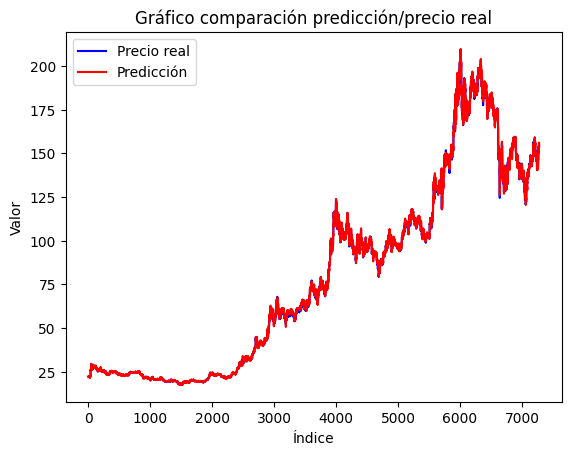

In [57]:
plt.plot(Valirpr, color='blue', label='Precio real')  # Línea azul
plt.plot(predict, color='red', label='Predicción')   # Línea roja
plt.title('Gráfico comparación predicción/precio real')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend() 

plt.show()

In [58]:
suma = 0
n = len(Valirpr)
mae = np.mean(np.abs(Valirpr - predict))
print("El error medio absoluto es: " + str(mae))
for i in range(0,n):
    suma = abs(predict[i] - Valirpr[i])/Valirpr[i] +  suma
error_medio = suma/n
emp = error_medio*100 # error medio en porcentaje
print("El error medio porcentualemente es: " + str(emp))

El error medio absoluto es: 0.8113275540694354
El error medio porcentualemente es: 0.9670508918721916


Probamos el algoritmo con los datos de test

In [59]:
Test1 = []
aux = df_test.iloc[0]
for r in range (0,df_test.shape[0] - 1):
    aux = df_test.iloc[r]
    Test1aux = []
    for i in range(1, aux.size):
        Test1aux.append(aux[i])
    Test1.append(Test1aux)
predictT = regr1.predict(Test1)
print(predictT)

C:\Users\raulg\AppData\Local\Temp\ipykernel_5152\886282011.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Test1aux.append(aux[i])


[154.31   153.732  154.3395 ... 142.393  142.6115 142.779 ]


In [60]:
Testrpr = []
for i in range(1,df_test.shape[0]):
    Testrpr.append(df_test.iloc[i].close)

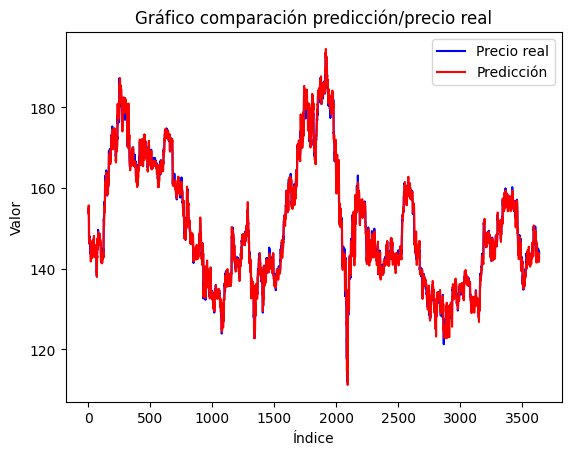

In [61]:
plt.plot(Testrpr, color='blue', label='Precio real')  # Línea azul
plt.plot(predictT, color='red', label='Predicción')   # Línea roja
plt.title('Gráfico comparación predicción/precio real')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend() 

plt.show()

In [62]:
suma = 0
n = len(Testrpr)
mae = np.mean(np.abs(Testrpr - predictT))
print("El error medio absoluto es: " + str(mae))
for i in range(0,n):
    suma = abs(predictT[i] - Testrpr[i])/Testrpr[i] +  suma
error_medio = suma/n
emp = error_medio*100 # error medio en porcentaje
print("El error medio porcentualemente es: " + str(emp))

El error medio absoluto es: 1.1719781473336992
El error medio porcentualemente es: 0.7826227595698083


# Predicción Utilizando XGBoost

In [63]:
df_xgb = df.copy()
df_xgb['close_next'] = df_xgb['close'].shift(-1)

In [64]:
df_xgb = df_xgb.dropna()
df_xgb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36399 entries, 0 to 36398
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        36399 non-null  object 
 1   open        36399 non-null  float64
 2   high        36399 non-null  float64
 3   low         36399 non-null  float64
 4   close       36399 non-null  float64
 5   value       36399 non-null  int64  
 6   close_next  36399 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.2+ MB


In [65]:
tamanio_xgb = df_xgb.shape[0]
tamanio_xgb

36399

In [66]:
df_train_xgb = df_xgb.copy().loc[0:int(tamanio_xgb*0.7)]
df_train_xgb

,date,open,high,low,close,value,close_next
0,2020-08-12 03:00:00,3.10,3.35,3.10,3.25,75,3.15
1,2020-08-12 04:00:00,3.25,3.25,3.15,3.15,75,3.30
2,2020-08-12 05:00:00,3.15,3.30,3.15,3.30,75,3.30
3,2020-08-12 06:00:00,3.30,3.30,3.15,3.30,75,3.25
4,2020-08-12 07:00:00,3.25,3.25,3.20,3.25,75,3.25
...,...,...,...,...,...,...,...
25475,2023-07-11 20:00:00,22.10,22.10,21.95,22.00,57,22.00
25476,2023-07-11 21:00:00,22.00,22.05,21.90,22.00,57,22.00
25477,2023-07-11 22:00:00,22.00,22.10,21.90,22.00,57,21.95
25478,2023-07-11 23:00:00,22.00,22.05,21.75,21.95,57,22.05


In [67]:
df_vali_xgb = df_xgb.copy().loc[int(tamanio_xgb*0.7 + 1):int(tamanio_xgb*0.9)]
df_vali_xgb

,date,open,high,low,close,value,close_next
25480,2023-07-12 01:00:00,22.05,22.15,22.00,22.10,64,22.15
25481,2023-07-12 02:00:00,22.10,22.30,22.05,22.15,64,22.10
25482,2023-07-12 03:00:00,22.15,22.25,22.10,22.10,64,22.00
25483,2023-07-12 04:00:00,22.10,22.10,22.00,22.00,64,21.95
25484,2023-07-12 05:00:00,22.00,22.00,21.90,21.95,64,22.00
...,...,...,...,...,...,...,...
32755,2024-05-10 04:00:00,153.40,153.80,152.70,153.65,66,153.95
32756,2024-05-10 05:00:00,153.65,154.35,152.85,153.95,66,153.75
32757,2024-05-10 06:00:00,153.95,154.70,153.45,153.75,66,153.30
32758,2024-05-10 07:00:00,153.75,154.10,152.30,153.30,66,154.95


In [68]:
df_test_xgb = df_xgb.copy().loc[int(tamanio_xgb*0.9 + 1):tamanio_xgb]
df_test_xgb

,date,open,high,low,close,value,close_next
32760,2024-05-10 09:00:00,154.95,155.75,154.25,154.35,66,154.10
32761,2024-05-10 10:00:00,154.35,154.50,153.45,154.10,66,154.15
32762,2024-05-10 11:00:00,154.10,154.80,153.25,154.15,66,154.15
32763,2024-05-10 12:00:00,154.15,154.30,153.25,154.15,66,155.05
32764,2024-05-10 13:00:00,154.15,155.20,153.00,155.05,66,153.30
...,...,...,...,...,...,...,...
36394,2024-10-08 19:00:00,143.80,143.95,142.40,143.35,49,142.95
36395,2024-10-08 20:00:00,143.35,143.90,142.35,142.95,49,143.75
36396,2024-10-08 21:00:00,142.95,144.10,142.25,143.75,49,144.50
36397,2024-10-08 22:00:00,143.75,144.50,143.35,144.50,49,144.25


Definimos los datos y características del entrenamiento

In [69]:
X = df_train_xgb[['open', 'high', 'low', 'close']] 
y = df_train_xgb['close_next']
X1 = df_vali_xgb[['open', 'high', 'low', 'close']] 
y1 = df_vali_xgb['close_next']

In [70]:
dtrain = xgb.DMatrix(data=X, label=y)
dvali = xgb.DMatrix(data=X1, label=y1)

In [103]:
param = {'max_depth': 10, 'eta': 0.1, 'objective': 'reg:squarederror'}
evals = [(dtrain, 'train'), (dvali, 'validacion')]

Entrenamos el modelo XGBoost

In [104]:
bst = xgb.train(param, dtrain, num_boost_round=1000, evals=evals, early_stopping_rounds=10, verbose_eval=10)

[0]	train-rmse:52.03058	validacion-rmse:55.14741
[10]	train-rmse:18.24075	validacion-rmse:19.29663
[20]	train-rmse:6.47113	validacion-rmse:6.89713
[30]	train-rmse:2.49259	validacion-rmse:2.78981
[40]	train-rmse:1.33772	validacion-rmse:1.70668
[50]	train-rmse:1.09531	validacion-rmse:1.52521
[60]	train-rmse:1.05078	validacion-rmse:1.50811
[70]	train-rmse:1.03892	validacion-rmse:1.50938
[71]	train-rmse:1.03808	validacion-rmse:1.50983


Lo probamos con los datos de validación

In [108]:
predict_xgb = bst.predict(dvali)

In [100]:
Valirpr_xgb = []
for i in range(0,df_vali_xgb.shape[0]):
    Valirpr_xgb.append(df_vali_xgb.iloc[i].close)

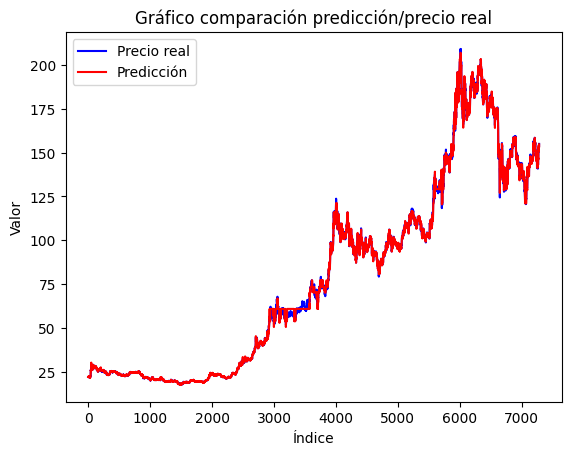

In [106]:
plt.plot(Valirpr_xgb, color='blue', label='Precio real')  # Línea azul
plt.plot(predict_xgb, color='red', label='Predicción')   # Línea roja
plt.title('Gráfico comparación predicción/precio real')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend() 

plt.show()

In [107]:
suma = 0
n = len(Valirpr_xgb)
mae = np.mean(np.abs(Valirpr_xgb - predict_xgb))
print("El error medio absoluto es: " + str(mae))
for i in range(0,n):
    suma = abs(predict_xgb[i] - Valirpr_xgb[i])/Valirpr_xgb[i] +  suma
error_medio = suma/n
emp = error_medio*100 # error medio en porcentaje
print("El error medio porcentualemente es: " + str(emp))

El error medio absoluto es: 0.5122382410279995
El error medio porcentualemente es: 0.6814544222019102


Preparamos los datos de test en el formato necesario

In [110]:
df_test_xgb_aux = df_test_xgb.iloc[:-1].copy()
X_test = df_test_xgb_aux[['open', 'high', 'low', 'close']] 
y_test = df_test_xgb_aux['close_next']
dtest = xgb.DMatrix(data=X_test, label=y_test)

Lo probamos con los datos de test

In [111]:
predict_xgb_test = bst.predict(dtest)

In [112]:
Test_xgb = []
for i in range(1,df_test_xgb.shape[0]):
    Test_xgb.append(df_test_xgb.iloc[i].close)

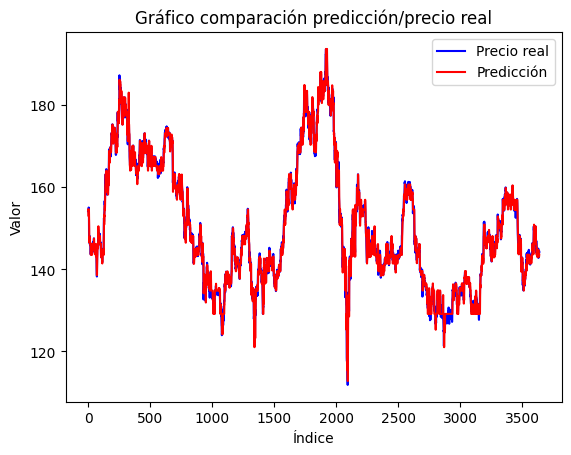

In [113]:
plt.plot(Test_xgb, color='blue', label='Precio real')  # Línea azul
plt.plot(predict_xgb_test, color='red', label='Predicción')   # Línea roja
plt.title('Gráfico comparación predicción/precio real')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend() 

plt.show()

In [114]:
suma = 0
n = len(Test_xgb)
mae = np.mean(np.abs(Test_xgb - predict_xgb_test))
print("El error medio absoluto es: " + str(mae))
for i in range(0,n):
    suma = abs(predict_xgb_test[i] - Test_xgb[i])/Test_xgb[i] +  suma
error_medio = suma/n
emp = error_medio*100 # error medio en porcentaje
print("El error medio porcentualemente es: " + str(emp))

El error medio absoluto es: 1.0809644047934774
El error medio porcentualemente es: 0.7275942239749614
